In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped dire

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


In [ ]:
font_path='/System/Library/Fonts/AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'AppleGothic'  # macOS
plt.rcParams['axes.unicode_minus'] = False

원본 이미지 shape: (600, 800, 3)
이미지 shape: (600, 800, 3) (Height, Width, Channel)
Height: 600, Width: 800, Channel: 3
배치 차원 추가 shape: (1, 600, 800, 3)
흑백 변환 shape: (600, 800, 1)
흑백 (H, W) shape: (600, 800)
채널 우선(3, H, W) shape: (3, 600, 800)


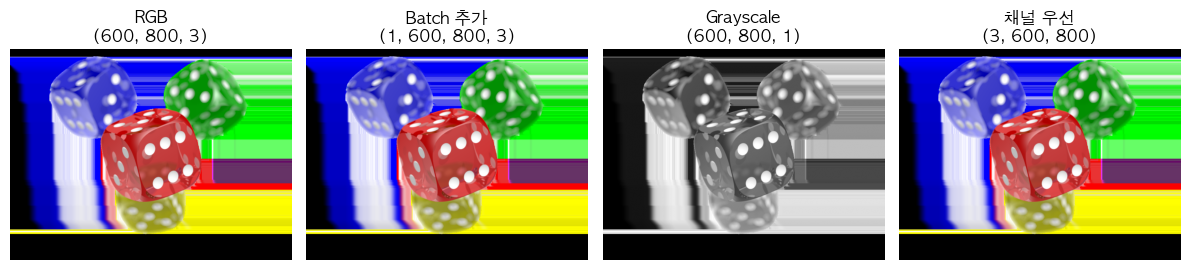

In [ ]:


# 1. 샘플 이미지 다운로드 (컬러 PNG)
url = 'https://upload.wikimedia.org/wikipedia/commons/4/47/PNG_transparency_demonstration_1.png'
image_path = tf.keras.utils.get_file('demo.png', origin=url)

# 2. 이미지 로드 및 디코딩 (채널 3개로 고정)
img_raw = tf.io.read_file(image_path)
img = tf.image.decode_png(img_raw, channels=3)  # [H, W, 3]
print("원본 이미지 shape:", img.shape)

# 3. 차원 구조 살펴보기
print(f"이미지 shape: {img.shape} (Height, Width, Channel)")
print(f"Height: {img.shape[0]}, Width: {img.shape[1]}, Channel: {img.shape[2]}")

# 4. (H, W, 3) → (1, H, W, 3): 배치 차원 추가
img_batch = tf.expand_dims(img, axis=0)
print("배치 차원 추가 shape:", img_batch.shape)



# 5. (H, W, 3) → (H, W): 흑백(Grayscale)로 변환
img_gray = tf.image.rgb_to_grayscale(img)
print("흑백 변환 shape:", img_gray.shape)  # (H, W, 1)

# 6. (H, W, 1) → (H, W): 채널 차원 squeeze로 제거
img_gray2d = tf.squeeze(img_gray, axis=-1)
print("흑백 (H, W) shape:", img_gray2d.shape)

# 7. (H, W, 3) → (3, H, W): 채널을 맨 앞으로 이동 (pytorch 스타일)
img_ch_first = tf.transpose(img, perm=[2, 0, 1])
print("채널 우선(3, H, W) shape:", img_ch_first.shape)

# 8. 이미지 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 4, 1)
plt.imshow(img.numpy())
plt.title(f"RGB\n{img.shape}")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_batch[0].numpy())
plt.title(f"Batch 추가\n{img_batch.shape}")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_gray.numpy().squeeze(), cmap='gray')
plt.title(f"Grayscale\n{img_gray.shape}")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_ch_first.numpy().transpose(1,2,0))
plt.title(f"채널 우선\n{img_ch_first.shape}")
plt.axis('off')

plt.tight_layout()
plt.show()
